In [0]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf

In [10]:
!pwd

/content


In [0]:
# Get images
image = img_to_array(load_img('woman.jpg'))
image = np.array(image, dtype=float)

In [0]:
X = rgb2lab(1.0/255*image)[:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,1:]
Y /= 128
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)

In [13]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

W0714 09:38:52.169627 140122037626752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0714 09:38:52.212673 140122037626752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0714 09:38:52.220916 140122037626752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0714 09:38:52.330768 140122037626752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.



W0714 09:38:52.402332 140122037626752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



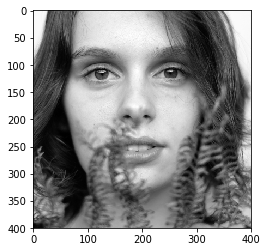

In [14]:
# Finish model
import matplotlib.pyplot as plt
model.compile(optimizer='rmsprop',loss='mse')
plt.imshow(X[0,:,:,0],cmap='gray')

In [0]:
from keras.callbacks import Callback
class my_callback(Callback):
  def on_epoch_begin(self, epoch, logs={}):
    if epoch % 1 == 0:
      tmp = np.zeros((400,400,3))
      tmp[:,:,0] = X[0,:,:,0]
      tmp[:,:,1:3] = 128 * self.model.predict(X)[0]
      plt.imshow(lab2rgb(tmp))
      plt.show()
    return
  

W0714 09:38:52.980302 140122037626752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0714 09:38:52.990613 140122037626752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.

/usr/local/lib/python3.6/dist-packages/skimage/color/colorconv.py:988: UserWarning: Color data out of range: Z < 0 in 10 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


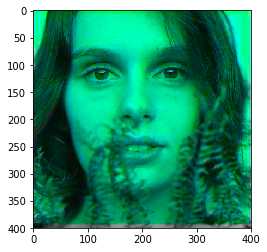

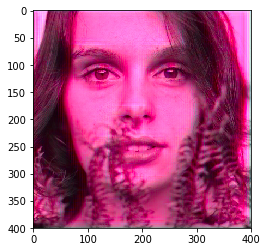

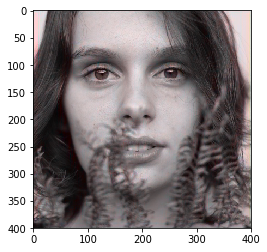

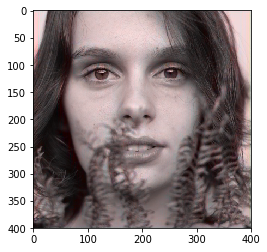

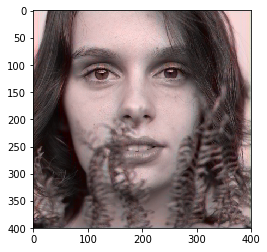

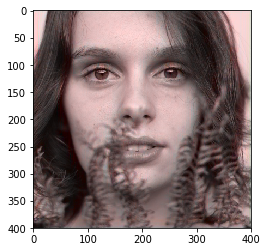

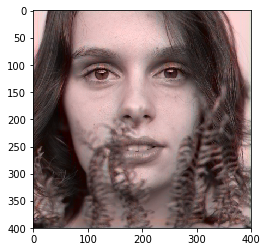

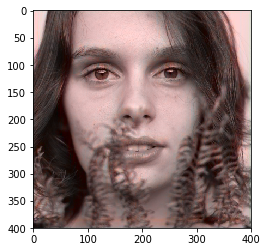

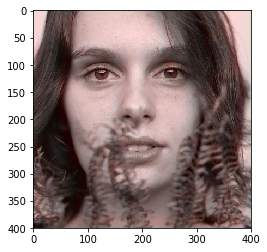

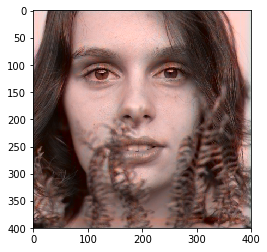

In [16]:
callback_show_prediction_every_epoch = my_callback()
model.fit(x=X, 
    y=Y,
    batch_size=1,
    epochs=10, callbacks=[callback_show_prediction_every_epoch], verbose=0)

In [17]:
print(model.evaluate(X, Y, batch_size=1))
output = model.predict(X)
output *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]
imsave("img_result.png", lab2rgb(cur))
imsave("img_gray_version.png", rgb2gray(lab2rgb(cur)))

1/1 [==============================] - 0s 71ms/step


W0714 09:39:03.501311 140122037626752 util.py:61] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


0.005751476623117924


W0714 09:39:03.680368 140122037626752 util.py:61] Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, None, None, 8)     80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 8)     584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 16)    1168      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 16)    2320      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 32)    4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, None, None, 32)    9248      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, None, None, 32)    0         
__________

In [19]:
print("The Convolution Kernel Weights:")
print(model.layers[0].get_weights()[0])
print("The Bias Weights:")
print(model.layers[0].get_weights()[1])

The Convolution Kernel Weights:
[[[[ 0.12549463  0.18592471  0.02252755  0.06171746  0.16027382
    -0.09304956  0.24158807  0.2727817 ]]

  [[ 0.24786617 -0.26098362  0.22577913 -0.04920642  0.18905328
    -0.19505139 -0.16141403  0.09993413]]

  [[ 0.04120068 -0.21237126  0.21991628 -0.20702414 -0.01087258
     0.01418128  0.15215755 -0.176302  ]]]


 [[[-0.27167836 -0.01827809 -0.1292605  -0.125908    0.13817774
    -0.0480835   0.15231052 -0.17677625]]

  [[-0.15830724 -0.26577932 -0.21234994 -0.01046032 -0.15897237
    -0.21041143  0.17391607 -0.12766354]]

  [[ 0.08400995 -0.13161014  0.12255558  0.23010291 -0.09215807
     0.08233924  0.0226343  -0.20047462]]]


 [[[-0.17281647 -0.16409244 -0.17591262  0.16303557 -0.02275484
     0.2693223  -0.08596378 -0.12581633]]

  [[ 0.2541771   0.0225881   0.16119677  0.16247341  0.03215578
    -0.00658149 -0.11467331 -0.09475697]]

  [[-0.13861485 -0.09556432  0.13138434  0.20822799  0.2311884
     0.10139252  0.11699164  0.26285884]]]]
T